In [1]:
import pandas as pd

from utils.ScoreGenerator import ScoreGenerator
from utils.TextViz import TextPlots


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

In [2]:
fb = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_facebook_1k-10k.tsv', delimiter='\t')
twit = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_twitter_1k-10k.tsv', delimiter='\t')
insta = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_instagram_1k-10k.tsv', delimiter='\t')

In [3]:
fb2 = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_facebook_10kplus.tsv',delimiter='\t')
twit2 = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_twitter_10kplus.tsv', delimiter='\t')
insta2 = pd.read_csv('F:/capstone_listenfirst/view_brand_rollup_instagram_10kplus.tsv', delimiter='\t')

In [4]:
dat = pd.read_csv('F:/capstone_listenfirst/1k-10k000', delimiter='\t', header=None)
dat1 = pd.read_csv('F:/capstone_listenfirst/1k-10k000', delimiter='\t', header=None)

dat = pd.concat([dat, dat1], ignore_index=True)
cols = ['comment_id', 'comment_dcs_uid', 'comment_author_id', 'post_dcs_uid', 'post_author_dcs_uid', 
        'comment_lfm_type', 'comment_posted_at', 'comment_message', 'comment_sentiment_polarity',
        'comment_primary_emotion', 'comment_ace_metadata', 'topics', 'comment_is_quote', 'spec_channel' ]
dat.columns = cols

In [5]:
brands = pd.read_csv('utils/brand_concat.csv')

In [6]:
clusters = pd.read_csv('utils/clusters.csv')

movie = clusters[clusters['replace']=='Blade Runner 2049'].loc[:, ['replace', 'brand_ods_id', 'top_genre', 
                                                                   'rating', 'source', 'franchise', 'inflated_budget']]

In [7]:
sg = ScoreGenerator(movie, 
                    pd.concat([fb, fb2], ignore_index=True), 
                    pd.concat([twit, twit2], ignore_index=True), 
                    pd.concat([insta, insta2], ignore_index=True))

In [8]:
sg.cluster()

In [9]:
sg.get_scores()

D:\git\lf_capstone\utils\ScoreGenerator.py:151: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\git\lf_capstone\utils\ScoreGenerator.py:156: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\git\lf_capstone\utils\ScoreGenerator.py:169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [10]:
sg.get_cluster_scores()

In [11]:
sg.plots()

In [12]:
tp = TextPlots(movie['brand_ods_id'].iloc[0], [-100, 100], dat)

In [13]:
tp.count_plot()

Now looking at -100 to 100 days after release


D:\git\lf_capstone\utils\TextViz.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
tp.sentiment_plot()

Now looking at -100 to 100 days after release


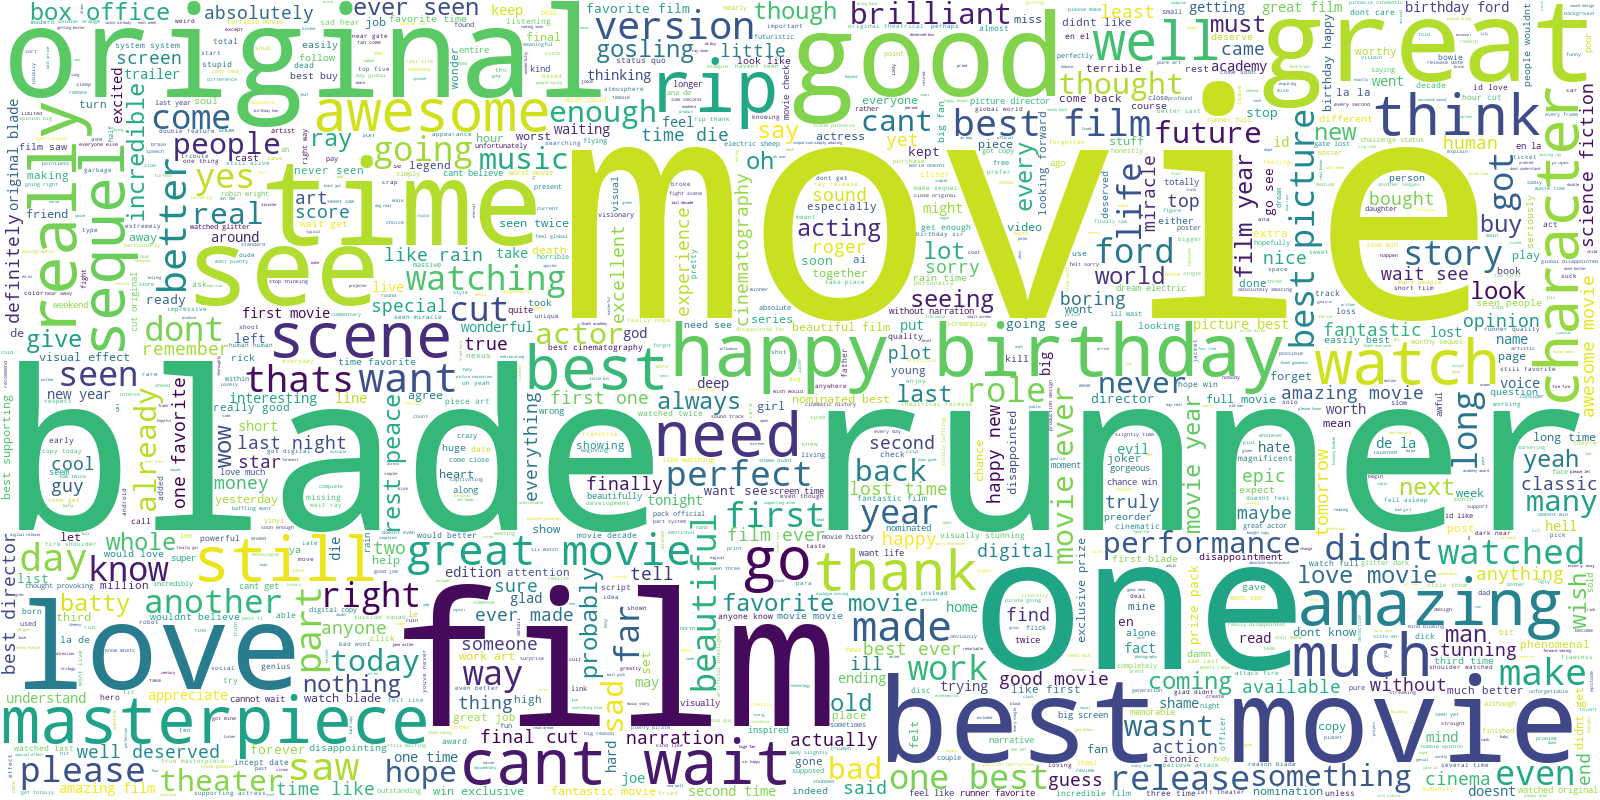

In [15]:
tp.wordcloud()